# LAB 5 - Maps

Often in geosciences research, we wish to produce maps displaying spatial data. Python provides two sets of tools for handling mapping: `Basemap` and `Cartopy`. `Basemap` is currently probably more popular, but its developers have announced that it will shortly be phased out in favour of `Cartopy`. We will therefore use `Cartopy` in this course.

```python
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
```
The second line here is, of course, just our familiar way of importing `matplotlib` for plotting.

Now, making a map is exactly the same as plotting in polar coordinates: we simply need to specify `projection=Projection()` when creating the plot. Here, `Projection()` is one of the Cartopy-supported [map projections](https://en.wikipedia.org/wiki/Map_projection). For example,
```python
ax = plt.subplot(111,projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
plt.show()
```
The `ax.set_global()` command informs Cartopy that we want to make a map of the whole globe, while the `ax.coastlines()` command draws coastline information onto it.

In [1]:
# Try it here!

import cartopy.crs as ccrs
import matplotlib.pyplot as plt


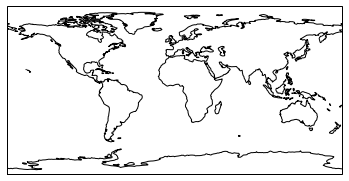

In [2]:
# Specify the projection then show the plot

ax = plt.subplot(111,projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
plt.show()


By default, the map is centred on the 0 longitude meridian. To change this, we can pass `central_longitude=longitude` to `ccrs.PlateCarree()`.

Make a single figure that consists of multiple subplots, illustrating the following projections:
- `ccrs.PlateCarree`
- `ccrs.Mercator`
- `ccrs.Mollweide`
- `ccrs.Robinson`
- `ccrs.InterruptedGoodeHomolosine`
- `ccrs.NearsidePerspective`

The maps we have made so far are global. If you only want to work with a subset of the globe, you can specify a different region (after creating the axes, but before doing any plotting) by removing `ax.set_global()` and instead calling `ax.set_extent((llon,rlon,llat,ulat))` where `llon` and `rlon` are the longitudes of the left- and right-hand sides of the region, and `llat` and `ulat` are the lower and upper latitudes of the region.  Remember to set `central_longitude` appropriately, or you may get surprising results.

Make a map of the area around your hometown. You may wish to pass `resolution='50m'` or `resolution='10m'` to `ax.coastlines()` to obtain a better-looking result.

In [3]:
# Try it here!


To add features such as rivers, national boundaries and so on to your map, we must import another submodule of Cartopy:
```python
import cartopy.feature as cf
```
This provides immediate access to several low-resolution feature datasets, including:
- `cf.BORDERS`
- `cf.COASTLINE`
- `cf.LAND`
- `cf.OCEAN`
- `cf.LAKES`
- `cf.RIVERS`

Each of these can be added to your plot by calling `ax.add_feature(feature)`; additional arguments such as `color=colorname` can be used to control how they are displayed.

In [ ]:
# Try it here!



For higher-resolution data, and for other features, Cartopy allows you to make use of data from [Natural Earth](https://www.naturalearthdata.com/). Unfortunately, the documentation for doing so is currently rather poor, and getting everything to work can require some amount of trial and error. The basic syntax is:
```python
ax.add_feature(cf.NaturalEarthFeature(category, name, scale),
               edgecolor=color,facecolor=color)
```
where `category` is either `'physical'` or `'cultural'`, `scale` is `'10m'`, `'50m'` or `'110m'`, and `'name'` is the name of the appropriate dataset. It seems this has to be inferred from the 'download' links on the Natural Earth website. The color options, `edgecolor` and `facecolor`, specify the colour used to draw outlines and fills; for some reason, it is necessary to pass the text string `'none'` (and not, as is more usual, the Python object `None`) if one does not want an object to be filled. Thus, for example, high-resolution rivers can be drawn by the command
```python
ax.add_feature(cf.NaturalEarthFeature('physical','rivers_lake_centerlines','10m'),
               edgecolor='blue',facecolor='none')
```
Add rivers and country boundaries (as appropriate) to your hometown map.

In [ ]:
# Try it here!


There is also an interface to [GSHHS coastline data](https://www.ngdc.noaa.gov/mgg/shorelines/).

Because Cartopy is built as an add-on to `matplotlib.pyplot`, you can use all of the standard plotting tools to add data to your map. For example, point data and lines can be added using `plt.plot()`, contours can be drawn using `plt.contour()`, and gridded data using `plt.imshow()`. However, it is critically important that you include `transform = <something appropriate>` in each plotting command, to ensure that Cartopy correctly interprets the data you provide. For most common cases, where your data is expressed in terms of latitude and longitude, the most appropriate choice will be `transform=ccrs.Geodetic()`. When a geodetic coordinate system is used, using `plt.plot()` to draw a line between two points will result in a geodesic curve (the great-circle path representing the shortest distance on the surface of the spherical Earth). If you instead wish to draw a line that appears straight in the 2-D plane, you can use `transform=ccrs.PlateCarree()`.

Create a global map and plot a line joining your hometown and Canberra using both `transform=ccrs.PlateCarree()` and `transform=ccrs.Geodetic()`. Satisfy yourself that you understand the difference. Plot (and label) the locations of your hometown, the capital city of your country, and Canberra.

In [ ]:
# Try it here!
